In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import pandas as pd
import tensorflow as tf
from geopy.geocoders import Nominatim
import datetime
import nycsales as nyc
from scipy import stats

#if all of the same borough are desired
#bk15 = pd.read_csv('data/2015_brooklyn.csv',sep = ',')
#bx15 = pd.read_csv('data/2015_bronx.csv',sep = ',')
#m15 = pd.read_csv('data/2015_manhattan.csv',sep = ',')
#q15 = pd.read_csv('data/2015_queens.csv',sep = ',')
#si15 = pd.read_csv('data/2015_statenisland.csv',sep = ',')

#pandas concat
#all_15 = pd.concat([m15,bx15,bk15,q15,si15])

#plot a pandas data frame just to show the data
bk15 = pd.read_csv('data/2015_brooklyn.csv',sep = ',')
bk15

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6360.0,22.0,,A5,8647 15TH AVENUE,,...,1.0,0.0,1.0,1547.0,1428.0,1930.0,1.0,A5,758000.0,2015-03-31
1,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6361.0,17.0,,A5,55 BAY 10TH STREET,,...,1.0,0.0,1.0,1933.0,1660.0,1930.0,1.0,A5,778000.0,2015-06-15
2,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6371.0,60.0,,A9,8620 19TH AVENUE,,...,1.0,0.0,1.0,2417.0,2106.0,1930.0,1.0,A9,0.0,2015-09-16
3,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6372.0,48.0,,S1,1906 86TH STREET,,...,1.0,1.0,2.0,1900.0,2090.0,1931.0,1.0,S1,1365000.0,2015-05-29
4,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6373.0,73.0,,A1,50 BAY 23RD STREET,,...,1.0,0.0,1.0,2417.0,1672.0,1930.0,1.0,A1,750000.0,2015-12-17
5,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6374.0,49.0,,S1,1964 86TH STREET,,...,1.0,1.0,2.0,1725.0,2112.0,1925.0,1.0,S1,1470000.0,2015-05-06
6,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6374.0,51.0,,S1,1970 86TH STREET,,...,1.0,1.0,2.0,1725.0,2112.0,1931.0,1.0,S1,1790000.0,2015-04-30
7,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6398.0,39.0,,A1,1638 BENSON AVENUE,,...,1.0,0.0,1.0,3625.0,1825.0,1925.0,1.0,A1,820000.0,2015-07-24
8,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6399.0,8.0,,S1,1653 BATH AVENUE,,...,1.0,1.0,2.0,1260.0,1440.0,1930.0,1.0,S1,0.0,2015-06-25
9,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,6399.0,108.0,,S1,1651 BATH AVENUE,,...,1.0,1.0,2.0,1260.0,1440.0,1930.0,1.0,S1,0.0,2015-06-25


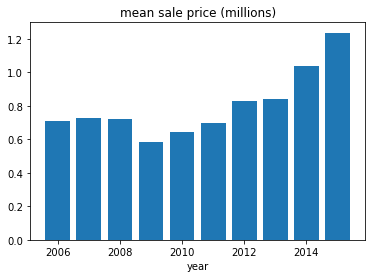

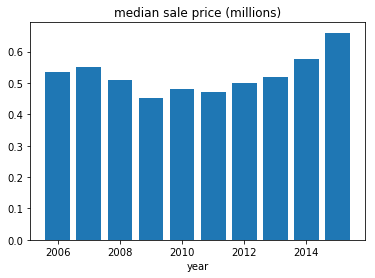

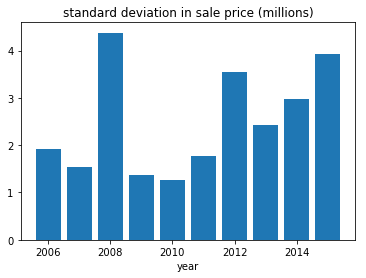

In [2]:
#calculate mean and variance for each year, by neighborhood
years = ['06','07','08','09','10','11','12','13','14','15']
yearlabel = ['20'+i for i in years]
nyears = len(years)
sales_mean = np.zeros((nyears,))
sales_median = np.zeros((nyears,))
sales_std = np.zeros((nyears,))
for i in range(nyears):
    #print(i)
    fname = 'data/20'+years[i]+'_brooklyn.csv'
    bk = pd.read_csv(fname,sep = ',')
    sales_bk = bk.loc[bk['SALE PRICE']> 0,'SALE PRICE']
    sales_mean[i] = np.mean(sales_bk)
    sales_median[i] = np.median(sales_bk)
    sales_std[i]  = np.std(sales_bk)
    


plt.bar(map(int,yearlabel),sales_mean/1.0e6)
plt.xlabel('year')
plt.title('mean sale price (millions)')
plt.show()

plt.bar(map(int,yearlabel),sales_median/1.0e6)
plt.xlabel('year')
plt.title('median sale price (millions)')
plt.show()

plt.bar(map(int,yearlabel),sales_std/1.0e6)
plt.xlabel('year')
plt.title('standard deviation in sale price (millions)')
plt.show()



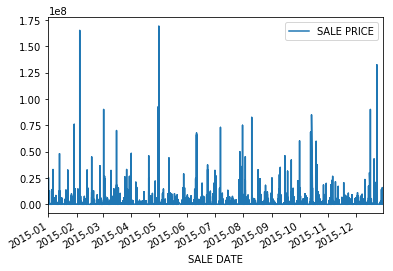

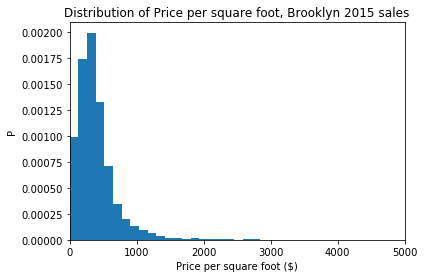

In [3]:
#timecourse of sales in 2015
fname = 'data/2015'+'_brooklyn.csv'
bk = pd.read_csv(fname,sep = ',')

#sort by date and plot
bk['SALE DATE'] =pd.to_datetime(bk['SALE DATE'])
bk.sort_values('SALE DATE')
bk.plot('SALE DATE','SALE PRICE')
plt.show()

#histogram of plot price per sq. ft
test = (bk['SALE PRICE'] > 0.0) & (bk['GROSS SQUARE FEET'] > 0.0)
vals_clean = bk.loc[test,['SALE PRICE','GROSS SQUARE FEET']]
ppsf = vals_clean['SALE PRICE']/vals_clean['GROSS SQUARE FEET']
plt.hist(ppsf,bins=300,normed = True)
plt.xlabel('Price per square foot ($)')
plt.ylabel('P')
plt.xlim([0,5000])
plt.title('Distribution of Price per square foot, Brooklyn 2015 sales')
plt.show()



In [4]:
#join 2015 data with the longitude and latitutde data from building shapefile
fname = 'data/2015'+'_brooklyn.csv'
bk = pd.read_csv(fname,sep = ',')
shapecsvname = 'data/BuildingFootprints_augmented.csv'
bknew = nyc.join_latlong(bk,shapecsvname)

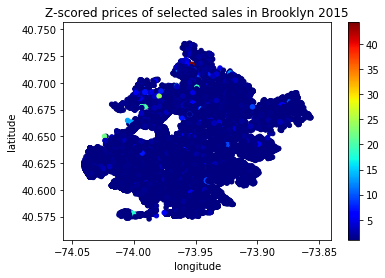

In [5]:
#grab first 2000 records and visualize. This will eventually be a geotiff
#and shown in a GIS viewer
bktemp = bknew.loc[1:2000,:]
bktemp = bknew
prices = np.array(bktemp['SALE PRICE'].tolist())
zscores = stats.zscore(prices) + abs(min(stats.zscore(prices))) + 1
bktemp.plot.scatter('long','lat',c=zscores,cmap='jet',sharex=False)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Z-scored prices of selected sales in Brooklyn 2015')
plt.show()

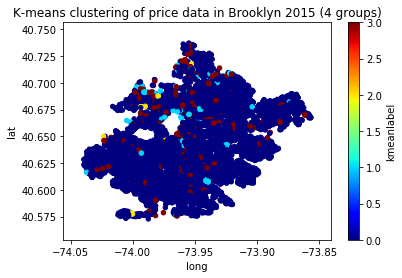

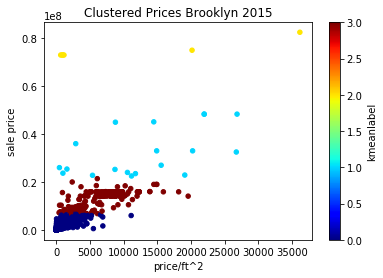

In [10]:
#try a clustering algorithm to group by prices and location
from sklearn.cluster import KMeans
test = (bknew['SALE PRICE'] > 0.0) & (bknew['GROSS SQUARE FEET'] > 0.0)
paramlist = ['SALE PRICE','GROSS SQUARE FEET','lat','long']
pd_clean = bknew.loc[test,paramlist]
#calculate price per sq. foot and add to data frame
ppsf = pd_clean['SALE PRICE']/vals_clean['GROSS SQUARE FEET']
pd_clean['ppsf']= ppsf

#k means clustering
params_eval = ['SALE PRICE','GROSS SQUARE FEET','lat','long']
pd_eval = pd_clean.loc[:,params_eval]
kmeans = KMeans(n_clusters=4, random_state=0).fit(np.array(pd_eval))
pd_eval['kmeanlabel'] = kmeans.labels_
pd_clean['kmeanlabel'] = kmeans.labels_

pd_eval.plot.scatter('long','lat',c='kmeanlabel',cmap='jet',sharex=False)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('K-means clustering of price data in Brooklyn 2015 (4 groups)')
plt.show()

pd_clean.plot.scatter('ppsf','SALE PRICE',c='kmeanlabel',cmap='jet',sharex=False)
plt.xlabel('price/ft^2')
plt.ylabel('sale price')
plt.title('Clustered Prices Brooklyn 2015')
plt.show()